- competition/dataset : [https://www.kaggle.com/zalando-research/fashionmnist](https://www.kaggle.com/zalando-research/fashionmnist)
- date : 2021/02/16
- original : [https://www.kaggle.com/shivamb/how-autoencoders-work-intro-and-usecases](https://www.kaggle.com/shivamb/how-autoencoders-work-intro-and-usecases)

## How Autoencoders Work: Intro and UseCases

**✏ 필사 1회** 

### How Autoencoders work - Understanding the math and implementation
**Contents**  
1. Introduction   
    1-1. What are Autoencoders?  
    1-2. How Autoencoders Work?  
2. Implementation and UseCases  
    2-1. UseCase 1: Image Reconstruction  
    2-2. UseCase 2: Noise Removal  
    2-3. UseCase 3: Sequence to Sequence Prediction  

### 1. Introduction

#### 1-1. What are Autoencoders?
오토인코더는 출력이 입력과 동일한 특별한 타입의 신경망 구조입니다. 오토인코더는 입력 데이터의 극도로 낮은 수준의 표현을 학습하기 위해 비지도 방식으로 훈련됩니다. 그 다음 이러한 낮은 수준의 feature들은 다시 변형되어 실제 데이터를 투영합니다. 오토인코더는 네트워크에서 입력을 예측하도록 요구되는 회귀 작업입니다. 이러한 네트워크들은 중앙의 일부 뉴런들에서 병목 현상이 있기 때문에, 디코더가 원래의 입력을 재현하기 위해 사용할 수 있는 저차원 코드로 입력을 압축하는 효과적인 표현을 만들 수 밖에 없습니다.  

일반적인 오토인코더 구조는 세 개의 메인 컴포넌트로 구성됩니다:  
* **Encoding Architecture**: 노드 수가 계속 감소하여 latent view representation으로 줄어드는 계층으로 구성
* **Latent View Representation**: 가장 낮은 수준의 공간으로, 입력이 줄어들고 정보는 유지됨
* **Decoding Architecture**: encoding architecture와 똑같은 형태이나 매 계층마다 노드 수가 증가하고, 궁극적으로 결과는 입력과 유사해짐  

![architecture](data/Rrmaise.png)

매우 정교하게 튜닝된 오토인코더 모델은 첫 번째 층에서 전달된 입력을 동일하게 재구성할 수 있어야 합니다. 이 커널에서는 오토인코더의 작업과 구현 과정을 안내하겠습니다. 오토인코더는 이미지 데이터와 함께 널리 사용되며 사례 중 일부는 다음과 같습니다:
* Dimentionality Reduction (차원 축소)
* Image Compression (이미지 압축)
* Image Denoising (이미지 노이즈 제거)
* Image Generation (이미지 생성)
* Feature Extraction (feature 추출)

#### 1-2.How Autoencoders Work?
오토인코더와 관련된 수학을 이해해봅시다. 오토인코더에 대한 주된 아이디어는 높은 수준의 차원 데이터에 대한 낮은 수준의 재현을 배우는 것입니다. 예시를 보며 인코딩 과정을 이해해봅시다. 데이터 재현 공간(데이터를 나타내는데 사용되는 N차원 공간) 및 두 변수 x1, x2로 나타내어지는 데이터의 점을 고려해야 합니다. 데이터 manifold는 실제 데이터가 있는 데이터 재현 공간 내부의 공간입니다.

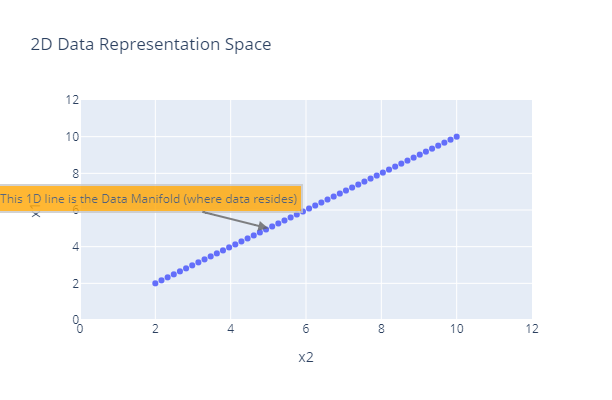

In [3]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import numpy as np
init_notebook_mode(connected=True)

# generate random data
N = 50
random_x = np.linspace(2, 10, N)
random_y1 = np.linspace(2, 10, N)
random_y2 = np.linspace(2, 10, N)

trace1 = go.Scatter(x=random_x, y=random_y1, mode='markers', name='Actual Data')
trace2 = go.Scatter(x=random_x, y=random_y2, mode='lines', name='Model')
layout = go.Layout(
    title='2D Data Representation Space',
    xaxis=dict(title='x2', range=(0, 12)), yaxis=dict(title='x1', range=(0, 12)),
    height=400, annotations=[
        dict(x=5, y=5, xref='x', yref='y',
             text='This 1D line is the Data Manifold (where data resides)',
             showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2,
             arrowcolor='#636363', ax=-120, ay=-30, bordercolor='#c7c7c7',
             borderwidth=2, borderpad=4, bgcolor='orange', opacity=0.8)
    ]
)
figure = go.Figure(data=[trace1], layout=layout)
iplot(figure)

이 데이터를 재현하기 위해 우리는 일반적으로 X, Y 2원을 사용합니다. 그러나 다음의 경우들을 정의할 수 있다면 이 공간의 차원을 1D로 축소할 수 있습니다:  
* 선의 기준점 A
* 수평선으로부터의 각도 L  

이 경우 직선 위 다른 점 B는 A와 각도 L로부터의 거리 d의 관점으로 나타낼 수 있습니다.

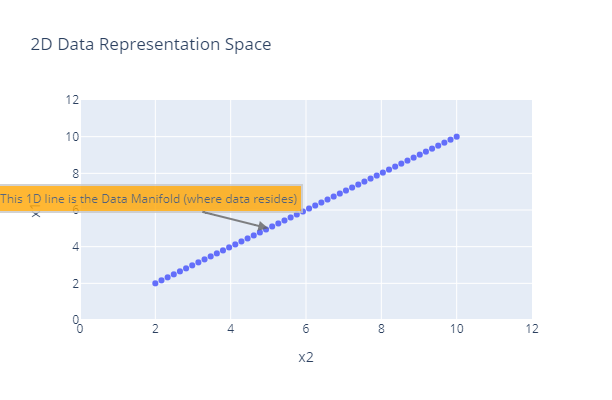

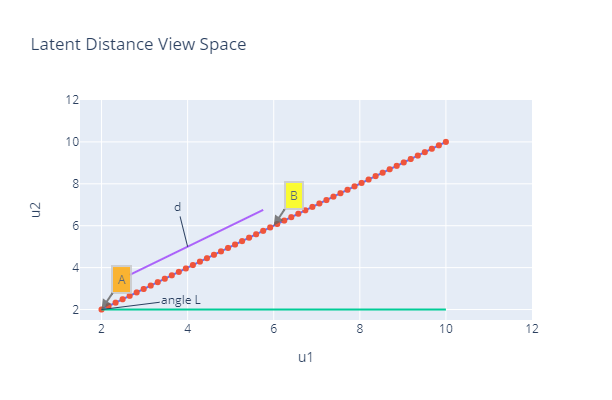

In [4]:
random_y3 = [2 for i in range(100)]
random_y4 = random_y2 + 1
trace4 = go.Scatter(x=random_x[4:24], y=random_y4[4:300], mode='lines')
trace3 = go.Scatter(x=random_x, y=random_y3, mode='lines')
trace2 = go.Scatter(x=random_x, y=random_y1, mode='markers')
trace1 = go.Scatter(x=random_x, y=random_y2, mode='lines')
layout = go.Layout(
    xaxis=dict(title="x1", range=(0,12)), yaxis=dict(title="x2", range=(0,12)),
    height=400, annotations=[
        dict(x=2, y=2, xref='x', yref='y', text='A', showarrow=True, align='center',
             arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363', ax=20,
             ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4,
             bgcolor='orange', opacity=0.8),
        dict(x=6, y=6, xref='x', yref='y', text='B', showarrow=True, align='center', arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363',
             ax=20, ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4,
             bgcolor='yellow', opacity=0.8),
        dict(x=4, y=5, xref='x', yref='y', text='d', ay=-40),
        dict(x=2, y=2, xref='x', yref='y', text='angle L', ax=80, ay=-10)
    ], title="2D Data Repersentation Space", showlegend=False
)
data = [trace1, trace2, trace3, trace4]
fugure = go.Figure(data=data, layout=layout)
iplot(figure)

##########

layout = go.Layout(
    xaxis=dict(title="u1", range=(1.5,12)), yaxis=dict(title="u2", range=(1.5,12)),
    height=400, annotations=[
        dict(x=2, y=2, xref='x', yref='y', text='A', showarrow=True, align='center',
             arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363', ax=20,
             ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4,
             bgcolor='orange', opacity=0.8), 
        dict(x=6, y=6, xref='x', yref='y', text='B', showarrow=True, align='center',
             arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='#636363', ax=20,
             ay=-30, bordercolor='#c7c7c7', borderwidth=2, borderpad=4,
             bgcolor='yellow', opacity=0.8),
        dict(x=4, y=5, xref='x', yref='y',text='d', ay=-40), 
        dict(x=2, y=2, xref='x', yref='y', text='angle L', ax=80, ay=-10)
    ], title="Latent Distance View Space", showlegend=False
)
data = [trace1, trace2, trace3, trace4]
figure = go.Figure(data=data, layout=layout)
iplot(figure)

그러나 여기서 로직/규칙에 관한 가장 중요한 질문은 점 B를 A와 각 L에 대해 나타낼 수 있는가라는 점입니다. 혹은 다른 용어로, B, A, L의 방정식은 무엇입니까? 고정된 식은 없지만 가장 가능한 방정식은 비지도 학습 과정을 통해 얻을 수 있다는 것이 그 답입니다. 간단히 말하면, 학습 과정은 B를 A와 L 형태로 바꾸는 규칙/방정식으로 나타낼 수 있습니다. 오토인코더 관점에서 이 과정을 이해해봅시다.  

은닉층이 없는 오토인코더를 생각해보면, 입력값 x1과 x2는 낮은 표현 d로 인코딩된 후 x1과 x2에 추가로 투영됩니다.  

![process](data/process.png)

**Step 1: Latent view 공간에서 포인트 재현**  
데이터 재현 공간에서 점 A와 B의 좌표는 다음과 같습니다:  
* Point A: (x1A, x2A)
* Point B: (x1B, x2B)

이 좌표는 latent view 공간에서 다음과 같습니다:  
(x1A, x2A) → (0, 0)  
(x1B, x2B) → (u1B, u2B)  
* Point A: (0, 0)
* point B: (u1B, u2B)

u1B와 u2B는 해당 점과 기준점 사이의 거리 형태로 나타내어질 수 있습니다:  
u1B = x1B - x1A  
u2B = x2B - x2A  

**Step 2: 점을 거리 d와 각도 L로 표현**  
이제, u1B와 u2B는 거리 d와 각도 L의 조합으로 나타낼 수 있습니다. 만약 이 점을 수직선 방향으로 각도 L만큼 회전하면 L은 0이 될 것입니다:  
**(d, L) → (d, 0)** (회전 후)  

이것은 인코딩 과정의 결과이며 저차원으로 데이터를 나타냅니다. 모든 layer의 weight과 bias를 가진 신경망의 기본 방정식을 상기해보자면 다음과 같습니다:  
**(d, 0) = W.(u1B, u2B)** (encoding)  

W는 은닉층의 weight 매트릭스입니다. 이런 이유로, 디코딩 과정은 인코딩 과정를 반사시킨 이미지라는 것을 알고 있습니다.  
**(u1B, u2B) = Inverse(W).(d, 0)** (decoding)  

latent view 공간에서 데이터 (x1, x2)의 축소된 형식은 (d, 0)이며 이것은 encoding architecture를 통해 얻어집니다. 유사하게 decoding architecture는 이 표현을 원래 형태 (u1B, u2B)로 변환한 다음 (x1, x2)로 변환합니다. 가장 중요한 점은 규칙/학습 함수/인코딩-디코딩 방정식은 데이터의 타입에 따라 달라진다는 점입니다.

#### Different Rules for Different Data
모든 타입의 데이터에 같은 규칙을 적용할 수는 없습니다. 예를들어, 이전 예제에서 우리는 1차원의 선형 데이터 매니폴드를 투영하고 각 L을 제거했습니다. 다음 데이터 매니폴드 예제를 살펴봅시다.

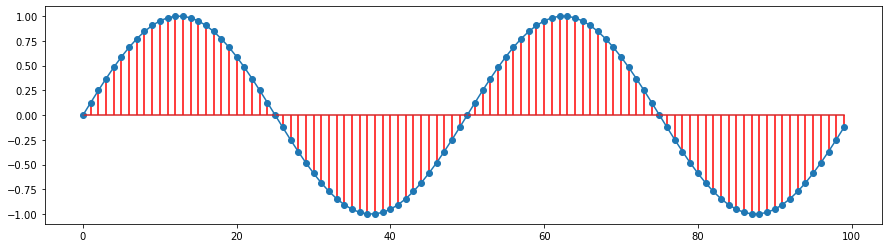

In [8]:
import matplotlib.pyplot as plt
import numpy as np
fs = 100
f = 2
x = np.arange(fs)
y = [np.sin(2 * np.pi * f * (i/fs)) for i in x]

%matplotlib inline
plt.figure(figsize=(15, 4))
plt.stem(x, y, 'r',)
plt.plot(x, y)
plt.show()

이러한 타입의 데이터에서 가장 중요한 문제점은 정보를 잃지 않고 단일 차원에서 데이터의 투영을 얻는 것입니다. 이러한 타입의 데이터가 latent space에 투영될 경우, 많은 정보가 손실되어 원래 형태로 변형시키고 투영하는 것이 거의 불가능합니다. 이동과 회전이 아무리 많이 적용되더라도 원본 데이터는 복구될 수 없습니다.  

그렇다면 신경망은 어떻게 이러한 문제점을 해결할까요? 매니폴드 공간에서 심층 신경망은 선형 데이터 폴드 뷰를 얻기 위해 공간을 구부릴 수 있는 속성을 가지고 있습니다. 오토인코더 구조는 latent view space에서 이들이 낮은 수준의 재현을 학습할 수 있도록 은닉층에 이러한 속성을 적용합니다.  

다음 이미지가 이러한 속성을 묘사합니다:  

![bend the space](data/gKCOdiL.png)

keras를 사용하여 오토인코더를 실행해봅시다. 먼저, 이미지로부터 feature들을 학습하고, 그 다음 같은 이미지를 결과로 투영해보겠습니다.

### 2. Implementation

#### 2-1. UseCase 1: Image Reconstruction

##### Load the required libraries

In [12]:
import pandas as pd
import numpy as np
from numpy import argmax, array_equal
import matplotlib.pyplot as plt

from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.models import Model
from imgaug import augmenters
from random import randint

##### Dataset Preparation
데이터셋 로딩, 예측 변수와 타겟 분리, 입력 정규화

In [30]:
# read dataset
train = pd.read_csv('data/fashion-mnist_train.csv')
train_x = train.drop('label', axis=1).values
train_y = train['label'].values

# normalize and reshape the predictors
train_x = train_x / 255

# create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

# reshape the inputs
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

##### Create Autoencoder architecture
오토인코더 구조를 만들어봅시다. 인코딩 파트는 2000, 1200, 500개 노드 총 세 layer로 구성되어 있습니다. 인코딩 구조는 10개의 노드로 된 latent view space와 연결되어 있으며, 이것은 500, 1200, 2000개의 노드로 구성된 디코딩 구조와 연결됩니다. 최종 layer는 입력 layer와 동일한 노드의 개수로 구성되어 있습니다.

In [31]:
# input layer
input_layer = Input(shape=(784,))

# encoding layer
encode_layer1 = Dense(2000, activation='relu')(input_layer)
encode_layer2 = Dense(1200, activation='relu')(encode_layer1)
encode_layer3 = Dense( 500, activation='relu')(encode_layer2)

# latent view
latent_view = Dense(10, activation='sigmoid')(encode_layer3)

# decoding layer
decode_layer1 = Dense( 500, activation='relu')(latent_view)
decode_layer2 = Dense(1200, activation='relu')(decode_layer1)
decode_layer3 = Dense(2000, activation='relu')(decode_layer2)

# output layer
output_layer = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

In [32]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 2000)              1570000   
_________________________________________________________________
dense_1 (Dense)              (None, 1200)              2401200   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               600500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_4 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_5 (Dense)              (None, 1200)              601200

이제, early stoppig callback을 사용하여 모델을 훈련해보겠습니다.

In [33]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10,
                               verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=20, batch_size=2048,
          validation_data=(val_x, val_x), callbacks=[early_stopping])

Epoch 1/20
24/24 [==============================] - 16s 610ms/step - loss: 0.1193 - val_loss: 0.0668
Epoch 2/20
24/24 [==============================] - 15s 639ms/step - loss: 0.0628 - val_loss: 0.0487
Epoch 3/20
24/24 [==============================] - 15s 615ms/step - loss: 0.0462 - val_loss: 0.0401
Epoch 4/20
24/24 [==============================] - 15s 644ms/step - loss: 0.0390 - val_loss: 0.0373
Epoch 5/20
24/24 [==============================] - 15s 637ms/step - loss: 0.0370 - val_loss: 0.0338
Epoch 6/20
24/24 [==============================] - 15s 609ms/step - loss: 0.0331 - val_loss: 0.0312
Epoch 7/20
24/24 [==============================] - 14s 595ms/step - loss: 0.0305 - val_loss: 0.0290
Epoch 8/20
24/24 [==============================] - 14s 582ms/step - loss: 0.0281 - val_loss: 0.0265
Epoch 9/20
24/24 [==============================] - 16s 671ms/step - loss: 0.0260 - val_loss: 0.0253
Epoch 10/20
24/24 [==============================] - 15s 613ms/step - loss: 0.0246 - val_lo

검증 데이터로 예측결과를 만들어 보겠습니다.

In [34]:
preds = model.predict(val_x)

원래와 예측된 이미지를 시각화합니다.  
**Inputs: 실제 이미지**

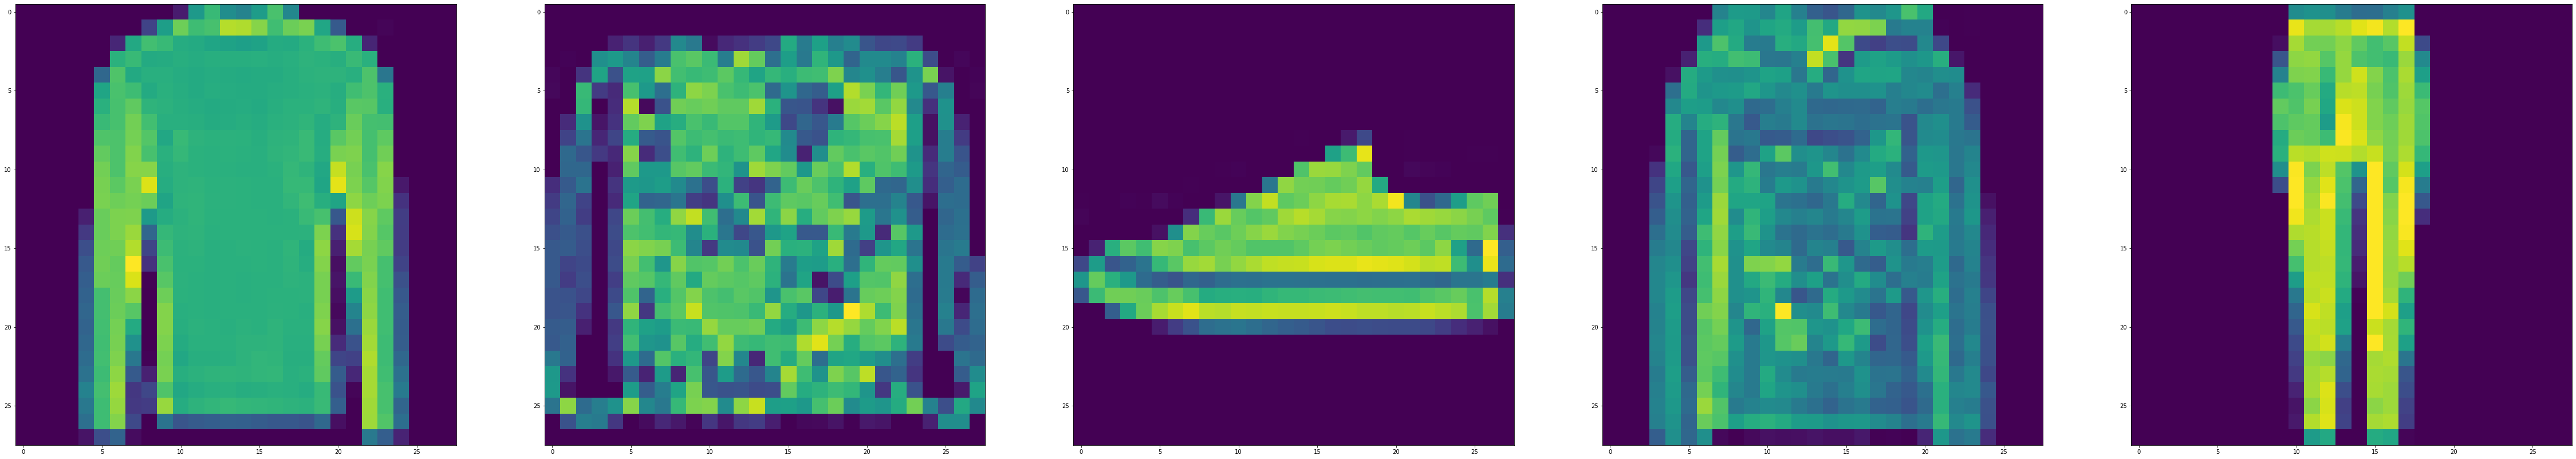

In [35]:
f, ax = plt.subplots(1, 5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

**Predicted: 오토인코더 결과**

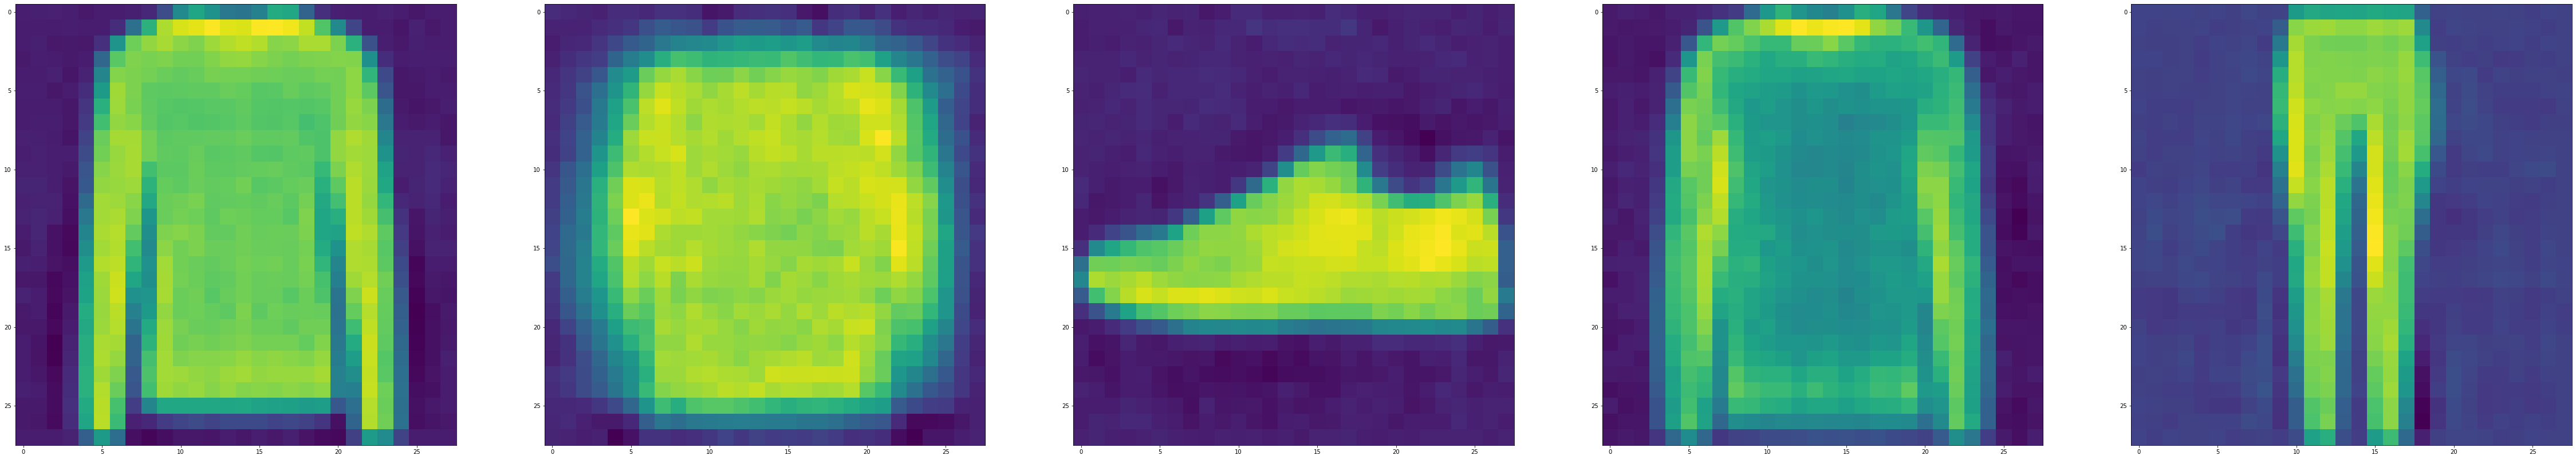

In [38]:
f, ax = plt.subplots(1, 5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()

#### 2-2. UseCase 2: Image Denoising
오토인코더는 매우 유용합니다. 오토인코더의 또다른 응용인 이미지 노이즈 제거에 대해 살펴봅시다. 많은 경우에 이미지는 데이터에 노이즈를 가지고 있으며, 오토인코더는 그러한 이미지를 제거하는데 사용할 수 있습니다.  

![denoising](data/denoising-autoencoder-600x299.jpg)  

먼저, 이미지 픽셀을 가지고 있는 train_x와 val_x 데이터를 준비해봅시다.

In [41]:
# recreate the train_x array and val_x array
train_x = train.drop('label', axis=1).values
train_x, val_x = train_test_split(train_x, test_size=0.2)

# normalize and reshape
train_x = train_x / 255.
val_x = val_x / 255.

오토인코더 네트워크에서 우리는 합성곱 네트워크가 이미지 입력에 매우 적합하기 대문에 합성곱 layer를 추가할 것입니다. 합성곱을 이미지 데이터에 적용하기 위해 우리는 입력을 28\*28 형태로 바꿔야합니다. CNN에 관련된 자세한 정보는 [이전 커널](https://www.kaggle.com/shivamb/a-very-comprehensive-tutorial-nn-cnn)을 참고하세요.

In [42]:
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)

##### Noisy Image
의도적으로 이미지에 노이즈를 넣을 수 있습니다. 저는 다양한 변형으로 이미지를 늘리기 위해 imgaug 패키지를 사용합니다. 이러한 변형 중 하나는 노이즈의 도입일 수 있습니다. 다음과 같은 또다른 타입의 노이즈들 또한 추가될 수 있습니다:  
* Salt and Pepper Noise
* Gaussian Noise
* Periodic Noise
* Speckle Noise  

impulse noise로도 알려진 salt and pepper noise를 우리 데이터에 적용해보겠습니다. 이 노이즈는 이미지 신호에 급격한 장애를 발생시키며, 여기저기 흰색과 검은색 픽셀들을 나타나게 합니다.

In [44]:
# Let's add sample noise - Salt and Pepper
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])

train_x_n = seq_object.augment_images(train_x * 255) / 255
val_x_n = seq_object.augment_images(val_x * 255) / 255

노이즈 추가 전

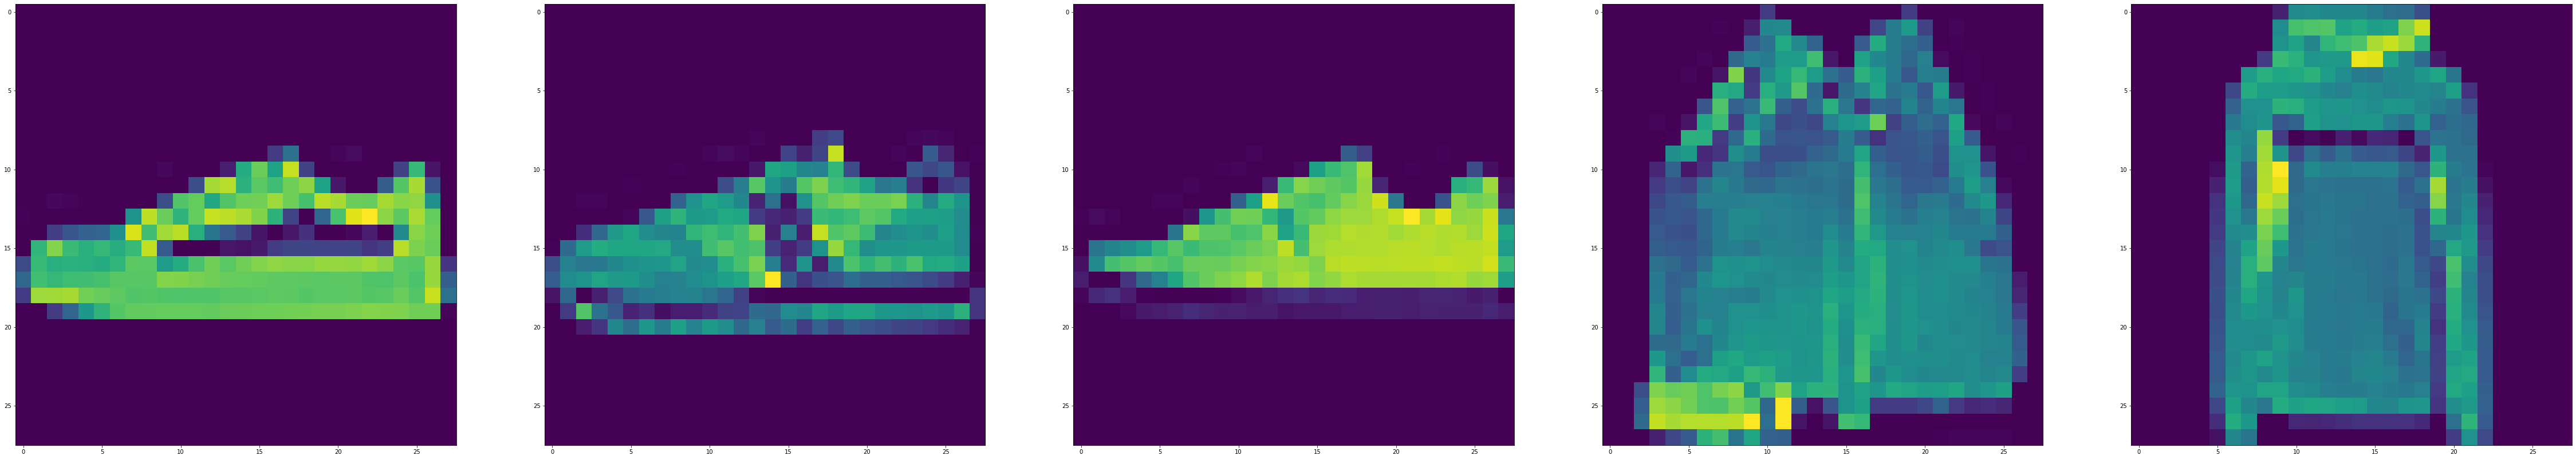

In [45]:
f, ax = plt.subplots(1, 5)
f.set_size_inches(80, 40)
for i in range(5, 10):
    ax[i-5].imshow(train_x[i].reshape(28, 28))
plt.show()

노이즈 추가 후

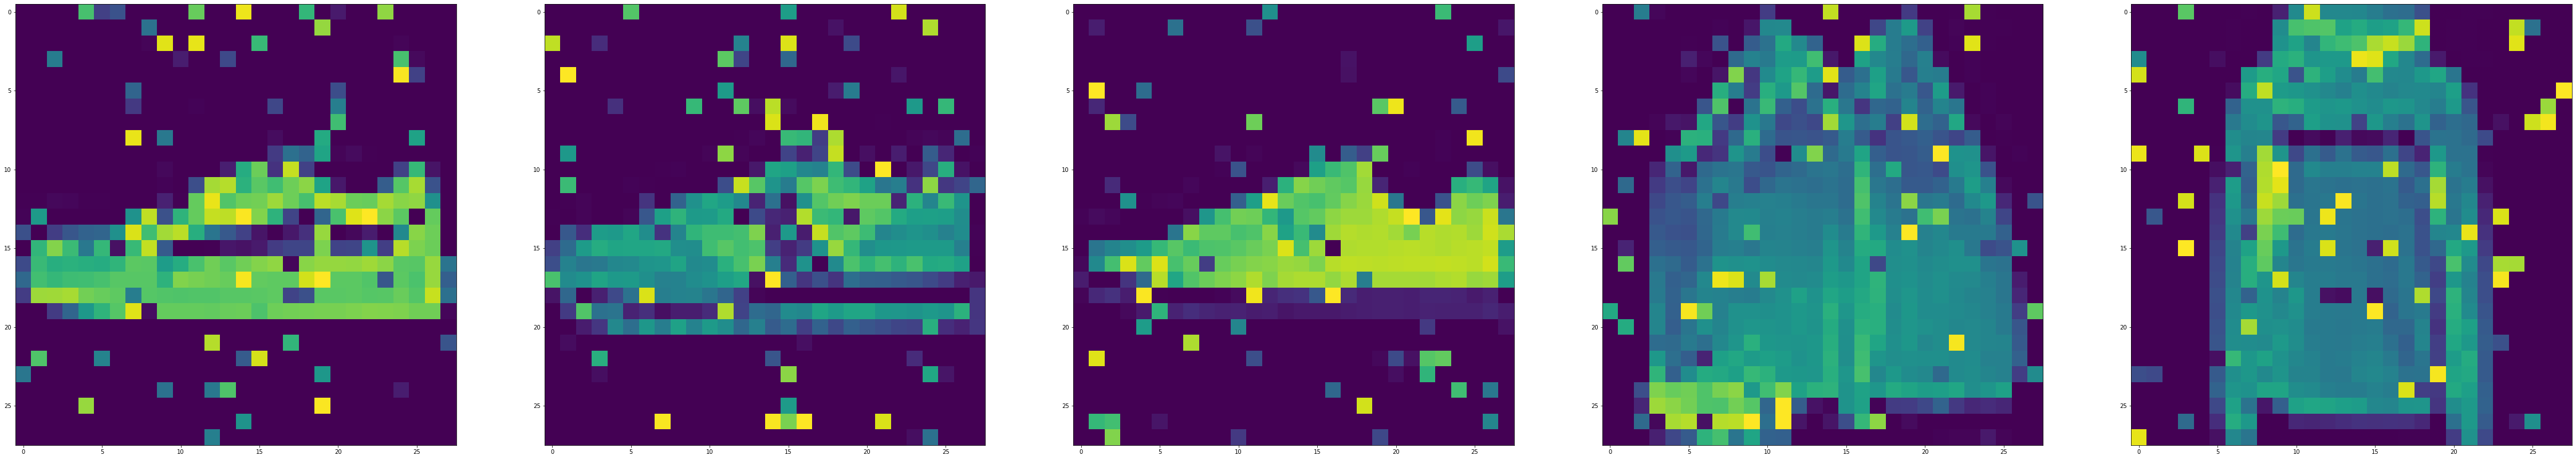

In [46]:
f, ax = plt.subplots(1, 5)
f.set_size_inches(80, 40)
for i in range(5, 10):
    ax[i-5].imshow(train_x_n[i].reshape(28, 28))
plt.show()

이제 오토인코더를 위한 모델 구조를 만들어 보겠습니다. 이러한 문제를 해결하기 위해 어떤 타입의 네트워크가 필요할지 이해해봅시다.  

**Encoding Architecture:**  
encoding architecture는 3개의 convolution layer와 3개의 max pooling layer가 차례차례 쌓인 구조로 이루어져 있습니다. relu가 convolution layer의 활성 함수로 사용되며 padding은 'same'으로 유지합니다. max pooling layer의 역할은 이미지 차원을 다운샘플링하는 것입니다. 이 layer는 초기 표현의 겹치지 않는 하위 영역에 대해 최대 필터를 적용합니다.  

**Decoding Architecture:**  
decoding architecture에서도 유사하게 convolution layer는 encoding architecture와 같은 차원을 사용합니다. 그러나 3개의 max pooling layer 대신 3개의 upsampling layer를 추가합니다. 활성 함수는 이전과 동일하며, convolution layer에서 padding 또한 동일합니다. max pooling 작업은 되돌릴 수 없으나, 각 pooling 지역 내 최대 위치를 기록함으로써 비슷하게 되돌릴 수 있습니다. upsampling layer는 이 속성을 사용하여 낮은 차원의 feature space에서 재구성을 투영합니다.

In [54]:
# input layer
input_layer = Input(shape=(28, 28, 1))

# encoding architecture
encoded_layer1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer1 = MaxPool2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)

# latent view
latent_view   = MaxPool2D( (2, 2), padding='same')(encoded_layer3)

# decoding architecture
decoded_layer1 = Conv2D(  16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(  32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(  64, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)

# output layer
output_layer = Conv2D(1, (3, 3), padding='same')(decoded_layer3)

# compile the model
model_2 = Model(input_layer, output_layer)
model_2.compile(optimizer='adam', loss='mse')

In [55]:
model_2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 16)          0   

early stopping callback을 사용하여 모델을 학습해 보겠습니다. epochs 값을 높일수록 더 나은 결과가 나옵니다.

In [56]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10,
                               verbose=5, mode='auto')
history = model_2.fit(train_x_n, train_x, epochs=10, batch_size=2048,
                      validation_data=(val_x_n, val_x), callbacks=[early_stopping])

Epoch 1/10
24/24 [==============================] - 141s 6s/step - loss: 0.1281 - val_loss: 0.0606
Epoch 2/10
24/24 [==============================] - 135s 6s/step - loss: 0.0531 - val_loss: 0.0397
Epoch 3/10
24/24 [==============================] - 127s 5s/step - loss: 0.0376 - val_loss: 0.0332
Epoch 4/10
24/24 [==============================] - 129s 5s/step - loss: 0.0322 - val_loss: 0.0293
Epoch 5/10
24/24 [==============================] - 130s 5s/step - loss: 0.0286 - val_loss: 0.0269
Epoch 6/10
24/24 [==============================] - 128s 5s/step - loss: 0.0264 - val_loss: 0.0253
Epoch 7/10
24/24 [==============================] - 130s 5s/step - loss: 0.0253 - val_loss: 0.0240
Epoch 8/10
24/24 [==============================] - 125s 5s/step - loss: 0.0237 - val_loss: 0.0229
Epoch 9/10
24/24 [==============================] - 128s 5s/step - loss: 0.0227 - val_loss: 0.0220
Epoch 10/10
24/24 [==============================] - 130s 5s/step - loss: 0.0218 - val_loss: 0.0212


모델의 예측 결과를 얻어봅시다.

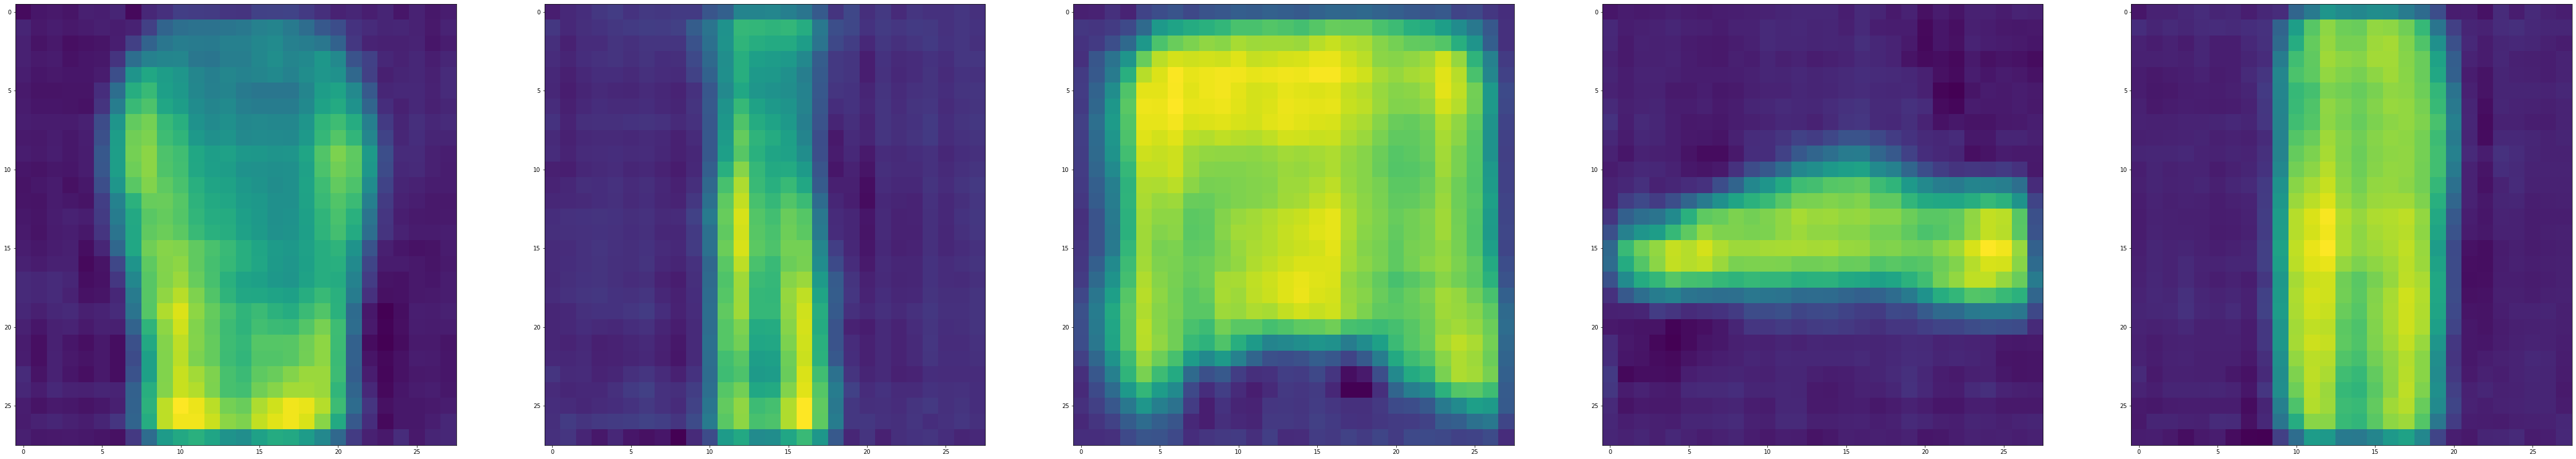

In [59]:
preds = model_2.predict(val_x_n[:10])
f, ax = plt.subplots(1, 5)
f.set_size_inches(80, 40)
for i in range(5, 10):
    ax[i-5].imshow(preds[i].reshape(28, 28))
plt.show()

이 실행에서는 epochs 값을 크게 적용하지 않았지만 더 나은 예측을 위해서는 500 - 1000 범위의 큰 숫자를 적용할 수 있습니다.

#### 2-3. UseCase 3: Sequence to Sequence Prediction using AutoEncoders
다음 유즈케이스는 sequence to sequence 예측입니다. 이전 예제에서 우리는 2차원 데이터를 입력하였으며, 이번 예제에서는 1차원적인 sequence 데이터를 입력할 것입니다. sequence 데이터의 예로는 시리즈 데이터와 텍스트 데이터가 있습니다. 이 유즈케이스는 기계 번역에 적용될 수 있습니다. 이미지 예제의 CNN과는 다르게 이 유즈케이스에서는 LSTM을 사용할 것입니다.  

이 섹션에서 대부분의 코드는 [Jason Brownie의 레퍼런스](https://machinelearningmastery.com/develop-encoder-decoder-model-sequence-sequence-prediction-keras)를 참고했습니다.

##### Autoencoder Architecture
이 유즈케이스의 구조는 소스 sequence를 인코딩하는 인코더와 인코딩된 소스 sequence를 타깃 sequence로 디코딩하는 디코더로 구성되어 있습니다. 먼저, 여기서 사용할 LSTM의 내부 작업을 이해해봅시다.  

* Long Short-Term Memory(LSTM)는 내부 게이트로 구성된 반복 신경망입니다.
* 다른 신경망들과는 다르게 네트워크의 내부 게이트는 backpropagation through time(BPTT)을 사용하여 모델을 성공적으로 훈련시키며, 기울기가 사라지는 문제를 피할 수 있게 합니다.
* LSTM layer에서 LSTM 메모리 유닛의 수를 정의할 수 있습니다. layer 내 각 유닛/셀은 'c'라고 하는 내부 메모리/셀 상태를 가지고 있으며, 종종 'h'라는 은닉 상태를 출력합니다.
* keras를 사용하여 LSTM layer의 현재 상태뿐만 아니라 출력 상태까지도 접근할 수 있습니다.  

이제 LSTM layer로 이루어진 sequence를 학습하고 생성하기 위한 오토인코더 구조를 만들어봅시다. 여기에는 두 가지 요소가 있습니다:  
* encoder architecture는 입력으로 sequence를 취하며 출력으로 LSTM의 상태를 반환합니다.
* decoder architecture는 입력으로 sequence와 encoder LSTM 상태를 취하며 디코딩된 출력 sequence를 반환합니다.
* LSTM의 은닉 상태와 메모리 상태를 저장하고 접근하여 보이지 않는 데이터에 대한 예측을 생성하는데 사용합니다.  

먼저, 고정된 길이의 random sequence를 포함한 sequence 데이터셋을 생성합니다. random sequence를 생성하는 함수를 만들겠습니다.
* X1: 무작위 숫자를 포함한 입력 sequence
* X2: 다른 sequence 요소를 재현하기 위한 seed로 사용하는 padded sequence
* y: 타깃 sequence나 실제 sequence

In [60]:
def dataset_preparation(n_in, n_out, n_unique, n_samples):
    X1, X2, y = [], [], []
    for _ in range(n_samples):
        # create random numbers sequence - input
        inp_seq = [randint(1, n_unique-1) for _ in range(n_in)]
        
        # create target sequence
        target = inp_seq[:n_out]
        
        # create padded sequence / seed sequence
        target_seq = list(reversed(target))
        seed_seq = [0] + target_seq[:-1]
        
        # convert to elements to categorical using keras api
        X1.append(to_categorical([inp_seq], num_classes=n_unique))
        X2.append(to_categorical([seed_seq], num_classes=n_unique))
        y.append(to_categorical([target_seq], num_classes=n_unique))
    
    # remove unnecessary dimension
    X1 = np.squeeze(np.array(X1), axis=1)
    X2 = np.squeeze(np.array(X2), axis=1)
    y = np.squeeze(np.array(y), axis=1)
    return X1, X2, y

samples = 100000
features = 51
inp_size = 6
out_size = 3

inputs, seeds, outputs = dataset_preparation(inp_size, out_size, features, samples)
print('Shapes:', inputs.shape, seeds.shape, outputs.shape)
print('Here is first categorically encoded input sequence looks like:',)
inputs[0][0]

Shapes: (100000, 6, 51) (100000, 3, 51) (100000, 3, 51)
Here is first categorically encoded input sequence looks like:


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [67]:
def define_models(n_input, n_output):
    # define the encoder architecture
    # input: sequence
    # output: encoder states
    encoder_inputs = Input(shape=(None, n_input))
    encoder = LSTM(128, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    encoder_states = [state_h, state_c]
    
    # define the encoder-decoder architecture
    # input: a seed sequence
    # output: decoder state, decoded output
    decoder_inputs = Input(shape=(None, n_output))
    decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = Dense(n_output, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    
    # define the decoder model
    # input: current states + encoded sequence
    # output: decoded sequence
    encoder_model = Model(encoder_inputs, encoder_states)
    decoder_state_input_h = Input(shape=(128,))
    decoder_state_input_c = Input(shape=(128,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = Model([decoder_inputs] + decoder_states_inputs,
                          [decoder_outputs] + decoder_states)
    
    return model, encoder_model, decoder_model

autoencoder, encoder_model, decoder_model = define_models(features, features)

In [68]:
encoder_model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, None, 51)]        0         
_________________________________________________________________
lstm_11 (LSTM)               [(None, 128), (None, 128) 92160     
Total params: 92,160
Trainable params: 92,160
Non-trainable params: 0
_________________________________________________________________


In [69]:
decoder_model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_22 (InputLayer)           [(None, None, 51)]   0                                            
__________________________________________________________________________________________________
input_23 (InputLayer)           [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_24 (InputLayer)           [(None, 128)]        0                                            
__________________________________________________________________________________________________
lstm_12 (LSTM)                  [(None, None, 128),  92160       input_22[0][0]                   
                                                                 input_23[0][0]            

In [70]:
autoencoder.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           [(None, None, 51)]   0                                            
__________________________________________________________________________________________________
input_22 (InputLayer)           [(None, None, 51)]   0                                            
__________________________________________________________________________________________________
lstm_11 (LSTM)                  [(None, 128), (None, 92160       input_21[0][0]                   
__________________________________________________________________________________________________
lstm_12 (LSTM)                  [(None, None, 128),  92160       input_22[0][0]                   
                                                                 lstm_11[0][1]             

In [71]:
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
autoencoder.fit([inputs, seeds], outputs, epochs=1)

3125/3125 [==============================] - 23s 6ms/step - loss: 1.4462 - acc: 0.5546


입력 sequence를 기반으로 하여 예측 sequence를 생성하는 함수를 만들겠습니다.

In [72]:
def reverse_onehot(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]

In [73]:
def predict_sequence(encoder, decoder, sequence):
    output = []
    target_seq = np.array([0.0 for _ in range(features)])
    target_seq = target_seq.reshape(1, 1, features)
    
    current_state = encoder.predict(sequence)
    for t in range(out_size):
        pred, h, c = decoder.predict([target_seq] + current_state)
        output.append(pred[0, 0, :])
        current_state = [h, c]
        target_seq = pred
    return np.array(output)

In [74]:
for k in range(5):
    X1, X2, y = dataset_preparation(inp_size, out_size, features, 1)
    target = predict_sequence(encoder_model, decoder_model, X1)
    print('\nInput Sequence=%s, SeedSequence=%s, PredictedSequence=%s'
          %(reverse_onehot(X1[0]), reverse_onehot(y[0]), reverse_onehot(target)))


Input Sequence=[18, 35, 42, 44, 43, 40], SeedSequence=[42, 35, 18], PredictedSequence=[42, 35, 18]

Input Sequence=[7, 3, 20, 26, 22, 31], SeedSequence=[20, 3, 7], PredictedSequence=[20, 3, 7]

Input Sequence=[23, 50, 5, 50, 41, 24], SeedSequence=[5, 50, 23], PredictedSequence=[5, 50, 23]

Input Sequence=[5, 47, 31, 30, 22, 6], SeedSequence=[31, 47, 5], PredictedSequence=[31, 47, 5]

Input Sequence=[39, 39, 10, 11, 22, 32], SeedSequence=[10, 39, 39], PredictedSequence=[10, 39, 39]
